Leave-one-group-out for the immune response prediction

In [1]:
import warnings
from anndata import ImplicitModificationWarning
warnings.filterwarnings("ignore", category=ImplicitModificationWarning)
warnings.filterwarnings("ignore")

In [2]:
import os,sys
sys.path.append(os.path.realpath(os.path.join(os.getcwd(), '..')))
import numpy as np
import scanpy as sc
import vqtcr as vq

In [3]:
path_base = '/mnt/d/Dataset/vqTCR/10xGenomics/'
path_data = path_base + 'avidity_esm.h5ad'

In [4]:
vq.set_random_seed(2025)
adata = sc.read_h5ad(path_data)
adata = adata[adata.obs['binding_name'].isin(vq.HIGH_COUNT_ANTIGENS)]
adata

View of AnnData object with n_obs × n_vars = 61096 × 5000
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'barcode',

In [5]:
params = vq.get_pred_config(lr=1e-4, latent_dim=64, dropout=0.2, 
                            num_subspace=2, codewords_per_space=64)
params['epoch'] = 20
params['pred']['dim_latent'] = 2*64
params

{'dim_latent': 64,
 'batch_size': 512,
 'lr': 0.0001,
 'dropout': 0.2,
 'epoch': 20,
 'early': 10,
 'dataset': '',
 'save_path': '',
 'direction': 'max',
 'weight_decay': 0.0001,
 'loss_weight': [1.0, 1.0, 1.0, 1.0],
 'gex': {'dim_latent': 64, 'act': 'elu', 'norm': True},
 'tcr': {'esm_type': 'facebook/esm2_t6_8M_UR50D',
  'kmer_kernels': [1, 3, 5, 7],
  'dim_latent': 64,
  'dim_emb': 64,
  'num_heads': 8,
  'forward_expansion': 4,
  'dropout': 0.2,
  'num_encoder': 2,
  'num_decoder': 2,
  'mask_rate': 0.15,
  'beta_only': False,
  'esm_tokens': True},
 'fus': {'dim_latent': 64, 'dropout': 0.2, 'film_reg': 1.0},
 'pty': {'dim_latent': 128,
  'num_subspace': 2,
  'codewords_per_space': 64,
  'eps': 1e-05,
  'init_scale': 1.0,
  'ema_decay': 0.99,
  'commitment_beta': 0.25,
  'use_cosine': True,
  'dead_code_interval': 1000,
  'dead_code_threshold': 0.0001,
  'dead_code_topk': 16,
  'diversity_weight': 0.001},
 'pred': {'dim_latent': 128, 'dropout': 0.2, 'n_labels': 8}}

Leave one donor out(LoDonor) TCR-pMHC binding prediction

pretrain on all donors

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


warmup codebook:   0%|          | 0/10 [00:00<?, ?it/s]

1.472695231437683 3.546380043029785 0.6809260845184326
1.281015157699585 3.487766742706299 0.6655604243278503
1.0998233556747437 3.454538583755493 0.6541275978088379
0.9316264390945435 3.4499969482421875 0.644219696521759
0.7938710451126099 3.439265727996826 0.6345335841178894
0.6816099286079407 3.421353578567505 0.6247962117195129
0.6003409624099731 3.4155921936035156 0.6156996488571167
0.5328773260116577 3.3942391872406006 0.606646716594696
0.48008692264556885 3.3687264919281006 0.5975104570388794
0.43737727403640747 3.3620314598083496 0.5886640548706055
0.4044763445854187 3.3476853370666504 0.5796509981155396
0.3744800090789795 3.3320541381835938 0.5708087086677551
0.35885360836982727 3.3293190002441406 0.5623623728752136
0.34035128355026245 3.3044490814208984 0.5536012053489685
0.3307301998138428 3.2949748039245605 0.54509037733078
0.3221978545188904 3.269589424133301 0.5364232063293457
0.3108955919742584 3.2569968700408936 0.5279636979103088
0.300750732421875 3.24613881111145 0.51

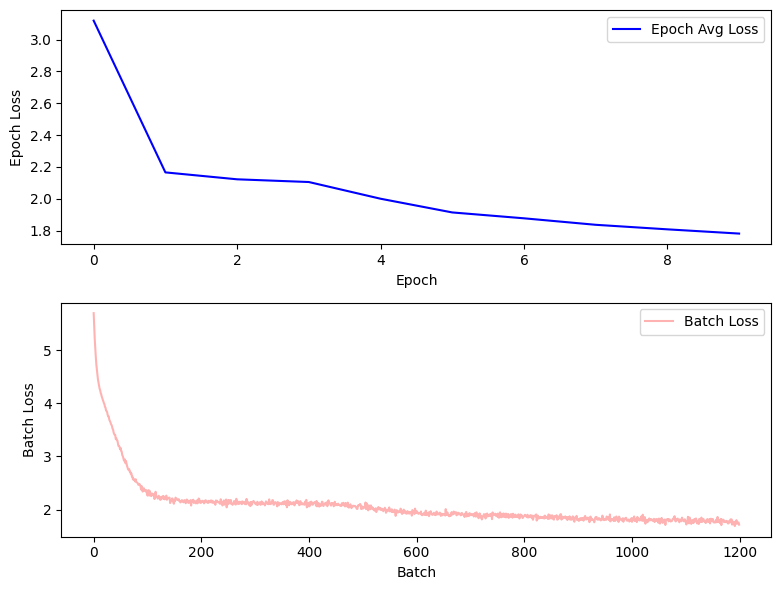

Sampling a subset of 16384 / 61096 for training
Clustering 16384 points in 64D to 64 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.07 s, search 0.07 s): objective=40100.6 imbalance=1.216 nsplit=0       
Sampling a subset of 16384 / 61096 for training
Clustering 16384 points in 64D to 64 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.07 s, search 0.06 s): objective=9839.98 imbalance=1.142 nsplit=0       


Pre-Training:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [55.80885696411133, 56.22627258300781] dead_rate_per_codebook[0.0, 0.0]
0.11815394461154938 1.6963346004486084 0.008334987796843052 0.00020643440075218678
perplexity_per_codebook [53.49690246582031, 53.047340393066406] dead_rate_per_codebook[0.015625, 0.015625]
0.1906285285949707 2.791853904724121 0.009234650060534477 0.00021016050595790148
perplexity_per_codebook [53.83951187133789, 6.073453903198242] dead_rate_per_codebook[0.0, 0.609375]
0.17333418130874634 2.7682204246520996 0.01962367817759514 0.00023804114607628435
perplexity_per_codebook [46.93616485595703, 2.2887587547302246] dead_rate_per_codebook[0.046875, 0.703125]
0.16756075620651245 2.740734577178955 0.023165900260210037 0.0002349007991142571
perplexity_per_codebook [34.40205383300781, 1.3889166116714478] dead_rate_per_codebook[0.09375, 0.921875]
0.1540508270263672 2.749389171600342 0.03879833593964577 0.0003261975070927292
perplexity_per_codebook [23.11704444885254, 1.12562096118927] dead_rate_per_c

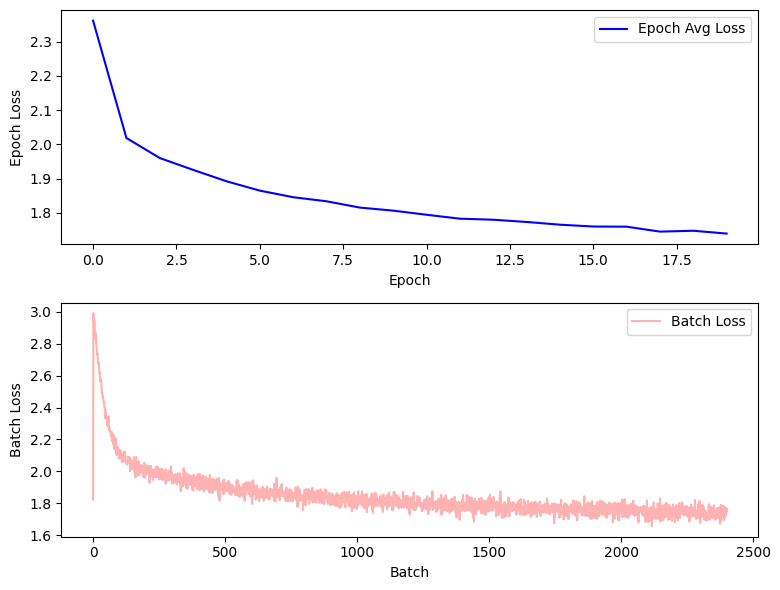

In [6]:
vqtcr = vq.vqTCR(params, adata, labels='binding_name')
vqtcr.pretrain(col_name='donor', 
               set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'],
               sample_mode='clonotype', 
               shuffle=False,
               labels=None,
               visual=True)

perplexity_per_codebook [22.108762741088867, 25.603221893310547] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [20.0871524810791, 22.79181480407715] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [19.585296630859375, 23.14808464050293] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [21.59559440612793, 23.291427612304688] dead_rate_per_codebook[0.15625, 0.265625]
perplexity_per_codebook [24.212108612060547, 24.346097946166992] dead_rate_per_codebook[0.203125, 0.25]
perplexity_per_codebook [25.681833267211914, 24.11366844177246] dead_rate_per_codebook[0.15625, 0.25]
perplexity_per_codebook [24.97394371032715, 23.32143783569336] dead_rate_per_codebook[0.140625, 0.28125]
perplexity_per_codebook [25.341970443725586, 30.367673873901367] dead_rate_per_codebook[0.140625, 0.1875]
perplexity_per_codebook [22.618383407592773, 28.24376678466797] dead_rate_per_codebook[0.109375, 0.15625]
perplexity_per_codebook [20.717166900634766, 24.550

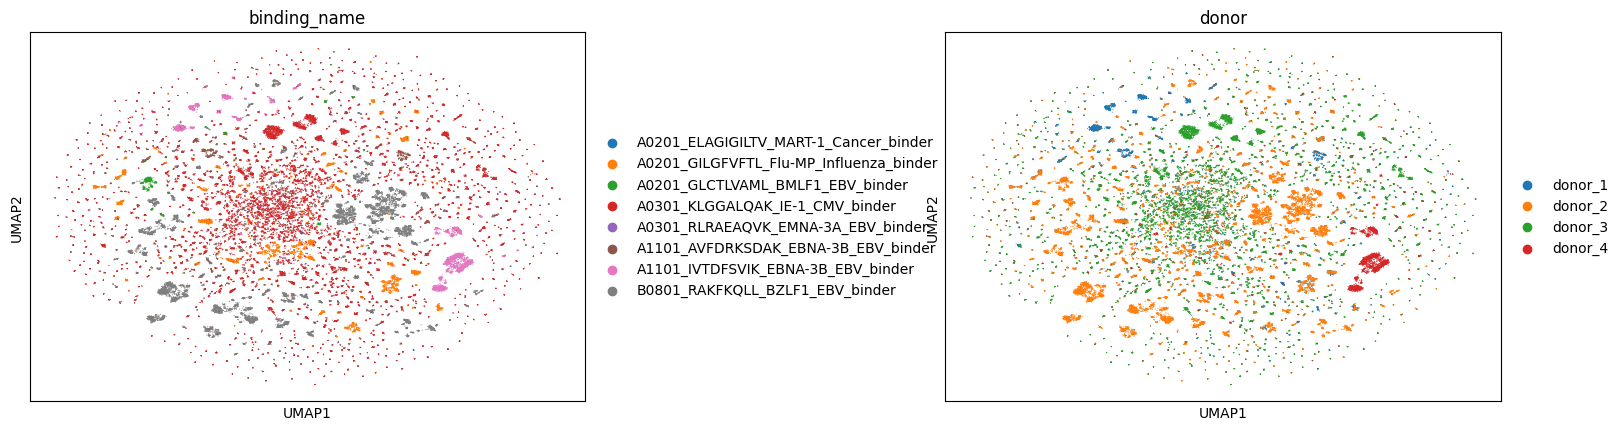

In [7]:
adata = vqtcr.get_latent(adata, col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
# tcr latent space
sc.pp.neighbors(adata, use_rep='htcell')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['binding_name', 'donor'], wspace=0.5)

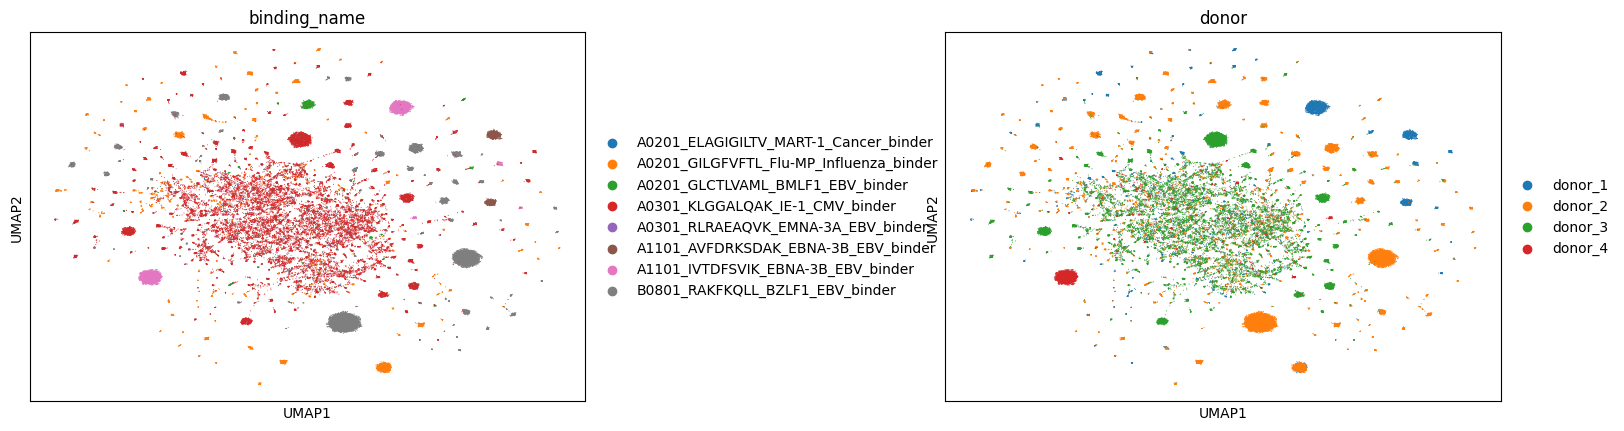

In [8]:
# tcr latent space
sc.pp.neighbors(adata, use_rep='htcr')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['binding_name', 'donor'], wspace=0.5)

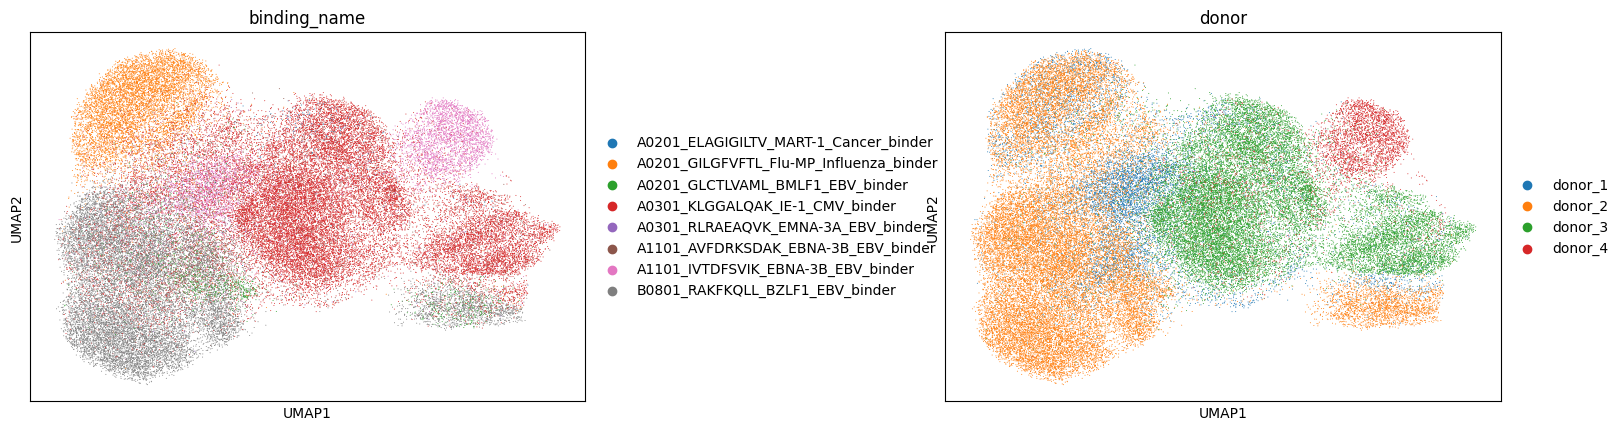

In [9]:
# gex residual latent space
sc.pp.neighbors(adata, use_rep='hgex')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['binding_name', 'donor'], wspace=0.5)

prediction training on remianing patients and test on leave-out patient

In [10]:
# test_score = vqtcr.compute_metrics(metrics='knn_prediction', eval_set='test')
record = {}
adata = vqtcr.get_latent(adata,col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
adata_train = adata[adata.obs['set'].isin(['train', 'valid'])]
adata_valid = adata[adata.obs['set']=='test']

knn_scores = vq.get_knn_cls(adata_train.obsm['htcr'], adata_valid.obsm['htcr'],
                            adata_train.obs['binding_name'], 
                            adata_valid.obs['binding_name'])
record['knn_prediction'] = knn_scores['weighted avg']['f1-score']
record['knn_prediction']

perplexity_per_codebook [22.108762741088867, 25.603221893310547] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [20.0871524810791, 22.79181480407715] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [19.585296630859375, 23.14808464050293] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [21.59559440612793, 23.291427612304688] dead_rate_per_codebook[0.15625, 0.265625]
perplexity_per_codebook [24.212108612060547, 24.346097946166992] dead_rate_per_codebook[0.203125, 0.25]
perplexity_per_codebook [25.681833267211914, 24.11366844177246] dead_rate_per_codebook[0.15625, 0.25]
perplexity_per_codebook [24.97394371032715, 23.32143783569336] dead_rate_per_codebook[0.140625, 0.28125]
perplexity_per_codebook [25.341970443725586, 30.367673873901367] dead_rate_per_codebook[0.140625, 0.1875]
perplexity_per_codebook [22.618383407592773, 28.24376678466797] dead_rate_per_codebook[0.109375, 0.15625]
perplexity_per_codebook [20.717166900634766, 24.550

0.47009277001918676

In [11]:
adata = vq.split_adata(adata, split_col='clonotype', random_seed=2025)
record = {}
adata = vqtcr.get_latent(adata, col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
adata_train = adata[adata.obs['set']=='train']
adata_valid = adata[adata.obs['set']=='test']

knn_scores = vq.get_knn_cls(adata_train.obsm['htcr'], adata_valid.obsm['htcr'],
                            adata_train.obs['binding_name'], 
                            adata_valid.obs['binding_name'])
record['knn_prediction'] = knn_scores['weighted avg']['f1-score']
record['knn_prediction']

perplexity_per_codebook [22.108762741088867, 25.603221893310547] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [20.0871524810791, 22.79181480407715] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [19.585296630859375, 23.14808464050293] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [21.59559440612793, 23.291427612304688] dead_rate_per_codebook[0.15625, 0.265625]
perplexity_per_codebook [24.212108612060547, 24.346097946166992] dead_rate_per_codebook[0.203125, 0.25]
perplexity_per_codebook [25.681833267211914, 24.11366844177246] dead_rate_per_codebook[0.15625, 0.25]
perplexity_per_codebook [24.97394371032715, 23.32143783569336] dead_rate_per_codebook[0.140625, 0.28125]
perplexity_per_codebook [25.341970443725586, 30.367673873901367] dead_rate_per_codebook[0.140625, 0.1875]
perplexity_per_codebook [22.618383407592773, 28.24376678466797] dead_rate_per_codebook[0.109375, 0.15625]
perplexity_per_codebook [20.717166900634766, 24.550

0.7973327235336144

In [12]:
from sklearn.model_selection import LeaveOneGroupOut, LeavePGroupsOut
logo = LeaveOneGroupOut()
all_test_metrics = []
donor_ids = adata.obs.donor.to_numpy()
import numpy as np
for train_valid_idx, test_idx in logo.split(X=adata.X, groups=donor_ids):
    test_donor = donor_ids[test_idx][0]
    print(f"\n=== test on {test_donor} ===")
    adata.obs.loc[adata.obs.index[train_valid_idx], 'set']='train'
    adata.obs.loc[adata.obs.index[test_idx], 'set'] = 'test'
    record = {}
    adata = vqtcr.get_latent(adata, col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
    adata_train = adata[adata.obs['set']=='train']
    adata_valid = adata[adata.obs['set']=='test']

    knn_scores = vq.get_knn_cls(adata_train.obsm['htcr'], adata_valid.obsm['htcr'],
                                adata_train.obs['binding_name'], 
                                adata_valid.obs['binding_name'])
    record['knn_prediction'] = knn_scores['weighted avg']['f1-score']
    print(record['knn_prediction'])


=== test on donor_1 ===
perplexity_per_codebook [22.108762741088867, 25.603221893310547] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [20.0871524810791, 22.79181480407715] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [19.585296630859375, 23.14808464050293] dead_rate_per_codebook[0.203125, 0.234375]
perplexity_per_codebook [21.59559440612793, 23.291427612304688] dead_rate_per_codebook[0.15625, 0.265625]
perplexity_per_codebook [24.212108612060547, 24.346097946166992] dead_rate_per_codebook[0.203125, 0.25]
perplexity_per_codebook [25.681833267211914, 24.11366844177246] dead_rate_per_codebook[0.15625, 0.25]
perplexity_per_codebook [24.97394371032715, 23.32143783569336] dead_rate_per_codebook[0.140625, 0.28125]
perplexity_per_codebook [25.341970443725586, 30.367673873901367] dead_rate_per_codebook[0.140625, 0.1875]
perplexity_per_codebook [22.618383407592773, 28.24376678466797] dead_rate_per_codebook[0.109375, 0.15625]
perplexity_per_codebook [2

In [13]:
all_test_metrics = []
for train_valid_idx, test_idx in logo.split(X=adata.X, groups=donor_ids):
    test_donor = donor_ids[test_idx][0]
    print(f"\n=== test on {test_donor} ===")
    # split train-valid dataset
    adata_train_val = adata[train_valid_idx]
    train, val = vq.split_dataset(adata_train_val, split_ratio=0.25, 
                                  split_col='clonotype', random_seed=2025)
    adata.obs['set'] = None
    adata.obs.loc[train.obs.index, 'set'] = 'train'
    adata.obs.loc[val.obs.index, 'set'] = 'valid'
    adata.obs.loc[adata.obs.index[test_idx], 'set'] = 'test'
    trainloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['train'],
                                     sample_mode='clonotype',
                                     shuffle=False, 
                                     labels='binding_name')
    validloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['valid'],
                                     sample_mode=None,
                                     shuffle=False, 
                                     labels='binding_name')
    testloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['test'],
                                     sample_mode=None,
                                     shuffle=False, 
                                     labels='binding_name')
    best_score = vqtcr.predict_train(trainloader, validloader)
    print(f'best score in validation: {best_score}')
    
    test_metrics = vqtcr.predict_test(testloader)
    all_test_metrics.append(test_metrics)
    
metric = 'weighted'
print("\n" + "="*60)
print("LOGO交叉验证最终结果:")
for i, metrics in enumerate(all_test_metrics):
        print(f"病人 {np.unique(donor_ids)[i]}: "
              f"f1: {metrics[f'f1_{metric}']:.3f}, "
              f"AUC-ROC: {metrics[f'auc_roc_{metric}']:.3f}, "
              f"AUC-PR: {metrics[f'auc_pr_{metric}']:.3f}")
    
# 计算平均性能
mean_f1 = np.nanmean([m[f'f1_{metric}'] for m in all_test_metrics])
mean_auc_roc = np.nanmean([m[f'auc_roc_{metric}'] for m in all_test_metrics])
mean_auc_pr = np.nanmean([m[f'auc_pr_{metric}'] for m in all_test_metrics])

print(f"\n平均性能: "
        f"fa: {mean_f1:.3f} ± {np.nanstd([m[f'f1_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-ROC: {mean_auc_roc:.3f} ± {np.nanstd([m[f'auc_roc_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-PR: {mean_auc_pr:.3f} ± {np.nanstd([m[f'auc_pr_{metric}'] for m in all_test_metrics]):.3f}")


=== test on donor_1 ===


Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [52.9780387878418, 52.53232192993164] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [51.51896667480469, 51.57551574707031] dead_rate_per_codebook[0.0625, 0.015625]
perplexity_per_codebook [54.56620407104492, 48.27880859375] dead_rate_per_codebook[0.03125, 0.0625]
perplexity_per_codebook [53.690181732177734, 52.83259201049805] dead_rate_per_codebook[0.015625, 0.015625]
perplexity_per_codebook [54.006656646728516, 51.39738845825195] dead_rate_per_codebook[0.015625, 0.015625]
perplexity_per_codebook [53.094688415527344, 50.70688247680664] dead_rate_per_codebook[0.03125, 0.046875]
perplexity_per_codebook [53.14139175415039, 48.31138229370117] dead_rate_per_codebook[0.0625, 0.046875]
perplexity_per_codebook [54.32292175292969, 50.79874801635742] dead_rate_per_codebook[0.015625, 0.03125]
perplexity_per_codebook [53.073097229003906, 50.25269317626953] dead_rate_per_codebook[0.03125, 0.046875]
perplexity_per_codebook [49.59294891357422, 51.5655059814

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [51.723876953125, 49.65987014770508] dead_rate_per_codebook[0.046875, 0.015625]
perplexity_per_codebook [53.547996520996094, 50.468990325927734] dead_rate_per_codebook[0.046875, 0.03125]
perplexity_per_codebook [52.88934326171875, 47.09861755371094] dead_rate_per_codebook[0.046875, 0.046875]
perplexity_per_codebook [50.11392593383789, 51.03920364379883] dead_rate_per_codebook[0.0625, 0.03125]
perplexity_per_codebook [54.340965270996094, 50.367584228515625] dead_rate_per_codebook[0.015625, 0.03125]
perplexity_per_codebook [50.897281646728516, 47.73584747314453] dead_rate_per_codebook[0.046875, 0.03125]
perplexity_per_codebook [53.93575668334961, 48.32692337036133] dead_rate_per_codebook[0.015625, 0.03125]
perplexity_per_codebook [52.51271057128906, 50.03337860107422] dead_rate_per_codebook[0.015625, 0.046875]
perplexity_per_codebook [52.599308013916016, 47.896358489990234] dead_rate_per_codebook[0.03125, 0.0625]
perplexity_per_codebook [50.10582733154297, 47.0250

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [52.23992156982422, 34.361568450927734] dead_rate_per_codebook[0.03125, 0.0625]
perplexity_per_codebook [47.99753952026367, 33.440670013427734] dead_rate_per_codebook[0.0625, 0.09375]
perplexity_per_codebook [50.03036117553711, 33.27171325683594] dead_rate_per_codebook[0.0625, 0.125]
perplexity_per_codebook [50.47262191772461, 32.40037155151367] dead_rate_per_codebook[0.03125, 0.109375]
perplexity_per_codebook [53.88785171508789, 33.976863861083984] dead_rate_per_codebook[0.03125, 0.109375]
perplexity_per_codebook [52.32774353027344, 34.99580764770508] dead_rate_per_codebook[0.0, 0.078125]
perplexity_per_codebook [51.89896774291992, 35.71266174316406] dead_rate_per_codebook[0.03125, 0.078125]
perplexity_per_codebook [50.22514724731445, 34.12976837158203] dead_rate_per_codebook[0.03125, 0.125]
perplexity_per_codebook [51.559471130371094, 36.099666595458984] dead_rate_per_codebook[0.09375, 0.0625]
perplexity_per_codebook [50.15569305419922, 34.616092681884766] dea

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [52.119163513183594, 52.191619873046875] dead_rate_per_codebook[0.015625, 0.015625]
perplexity_per_codebook [53.767642974853516, 52.1534423828125] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [53.473480224609375, 51.096492767333984] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [54.76784133911133, 51.36760711669922] dead_rate_per_codebook[0.015625, 0.03125]
perplexity_per_codebook [50.949684143066406, 53.627315521240234] dead_rate_per_codebook[0.0625, 0.015625]
perplexity_per_codebook [50.702964782714844, 52.848262786865234] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [54.23183059692383, 52.61698532104492] dead_rate_per_codebook[0.03125, 0.03125]
perplexity_per_codebook [54.44123077392578, 50.29056930541992] dead_rate_per_codebook[0.0, 0.03125]
perplexity_per_codebook [54.09827423095703, 51.26643371582031] dead_rate_per_codebook[0.015625, 0.03125]
perplexity_per_codebook [54.617000579833984, 51.36291

In [14]:
all_test_metrics = []
for i in range(5):
    adata = vq.split_adata(adata, split_col='clonotype', random_seed=i)
    trainloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['train'],
                                     sample_mode='clonotype',
                                     shuffle=False, 
                                     labels='binding_name')
    validloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['valid'],
                                     sample_mode=None,
                                     shuffle=False, 
                                     labels='binding_name')
    testloader = vq.get_dataloader(adata=adata,
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['test'],
                                     sample_mode=None,
                                     shuffle=False,
                                     labels='binding_name')
    best_score = vqtcr.predict_train(trainloader, validloader)
    print(f'best score in validation: {best_score}')
    
    test_metrics = vqtcr.predict_test(testloader)
    all_test_metrics.append(test_metrics)

print("\n" + "="*60)
print("LOGO交叉验证最终结果:")
for i, metrics in enumerate(all_test_metrics):
        print(f"splite {i}: "
              f"F1: {metrics[f'f1_{metric}']:.3f}, "
              f"AUC-ROC: {metrics[f'auc_roc_{metric}']:.3f}, "
              f"AUC-PR: {metrics[f'auc_pr_{metric}']:.3f}")
    
# 计算平均性能
mean_f1 = np.nanmean([m[f'f1_{metric}'] for m in all_test_metrics])
mean_auc_roc = np.nanmean([m[f'auc_roc_{metric}'] for m in all_test_metrics])
mean_auc_pr = np.nanmean([m[f'auc_pr_{metric}'] for m in all_test_metrics])

print(f"\n平均性能: "
        f"F1: {mean_f1:.3f} ± {np.nanstd([m[f'f1_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-ROC: {mean_auc_roc:.3f} ± {np.nanstd([m[f'auc_roc_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-PR: {mean_auc_pr:.3f} ± {np.nanstd([m[f'auc_pr_{metric}'] for m in all_test_metrics]):.3f}")

    

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [51.211734771728516, 53.12535858154297] dead_rate_per_codebook[0.09375, 0.03125]
perplexity_per_codebook [52.517059326171875, 51.515296936035156] dead_rate_per_codebook[0.0, 0.03125]
perplexity_per_codebook [52.7913932800293, 51.059261322021484] dead_rate_per_codebook[0.015625, 0.015625]
perplexity_per_codebook [50.47338104248047, 50.84096145629883] dead_rate_per_codebook[0.046875, 0.015625]
perplexity_per_codebook [52.91743469238281, 50.89075469970703] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [53.01699447631836, 51.56235885620117] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [55.3018798828125, 52.19804382324219] dead_rate_per_codebook[0.015625, 0.03125]
perplexity_per_codebook [54.44240951538086, 52.07545471191406] dead_rate_per_codebook[0.015625, 0.015625]
perplexity_per_codebook [49.59111785888672, 54.69456100463867] dead_rate_per_codebook[0.078125, 0.03125]
perplexity_per_codebook [51.99515151977539, 52.968276977

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [52.61053466796875, 50.85480880737305] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [51.30059814453125, 51.01568603515625] dead_rate_per_codebook[0.046875, 0.03125]
perplexity_per_codebook [52.976322174072266, 54.91203689575195] dead_rate_per_codebook[0.046875, 0.015625]
perplexity_per_codebook [50.90902328491211, 53.275508880615234] dead_rate_per_codebook[0.0625, 0.03125]
perplexity_per_codebook [55.337650299072266, 51.07025909423828] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [53.87156295776367, 53.47970199584961] dead_rate_per_codebook[0.046875, 0.015625]
perplexity_per_codebook [53.63755416870117, 51.83623123168945] dead_rate_per_codebook[0.046875, 0.015625]
perplexity_per_codebook [52.87931823730469, 52.83485794067383] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [50.3812370300293, 50.46432113647461] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [53.767372131347656, 49.1912

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [54.06232452392578, 50.47498321533203] dead_rate_per_codebook[0.015625, 0.03125]
perplexity_per_codebook [52.472110748291016, 51.62400817871094] dead_rate_per_codebook[0.0, 0.015625]
perplexity_per_codebook [53.83610153198242, 51.96144104003906] dead_rate_per_codebook[0.046875, 0.03125]
perplexity_per_codebook [53.89188766479492, 53.18569564819336] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [52.74363708496094, 54.67881393432617] dead_rate_per_codebook[0.046875, 0.015625]
perplexity_per_codebook [53.11561965942383, 51.24037170410156] dead_rate_per_codebook[0.0625, 0.015625]
perplexity_per_codebook [53.76039505004883, 52.390159606933594] dead_rate_per_codebook[0.046875, 0.015625]
perplexity_per_codebook [52.150535583496094, 54.28238296508789] dead_rate_per_codebook[0.046875, 0.015625]
perplexity_per_codebook [53.09091567993164, 53.27119064331055] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [52.933433532714844, 53.552120

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [53.10841369628906, 51.116695404052734] dead_rate_per_codebook[0.03125, 0.03125]
perplexity_per_codebook [52.28498840332031, 52.169986724853516] dead_rate_per_codebook[0.046875, 0.015625]
perplexity_per_codebook [52.854766845703125, 52.84947204589844] dead_rate_per_codebook[0.0625, 0.015625]
perplexity_per_codebook [53.12594985961914, 53.276432037353516] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [51.73746871948242, 50.53641891479492] dead_rate_per_codebook[0.046875, 0.03125]
perplexity_per_codebook [51.847049713134766, 52.66881561279297] dead_rate_per_codebook[0.0625, 0.015625]
perplexity_per_codebook [55.113704681396484, 50.99633026123047] dead_rate_per_codebook[0.015625, 0.046875]
perplexity_per_codebook [54.24513626098633, 51.328800201416016] dead_rate_per_codebook[0.015625, 0.03125]
perplexity_per_codebook [51.72123718261719, 53.397586822509766] dead_rate_per_codebook[0.0625, 0.015625]
perplexity_per_codebook [53.24026107788086, 50.99

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [52.83884048461914, 51.91249084472656] dead_rate_per_codebook[0.0, 0.015625]
perplexity_per_codebook [53.83369827270508, 51.2010612487793] dead_rate_per_codebook[0.0, 0.03125]
perplexity_per_codebook [54.21683120727539, 51.5262451171875] dead_rate_per_codebook[0.0, 0.03125]
perplexity_per_codebook [52.57667922973633, 51.835975646972656] dead_rate_per_codebook[0.046875, 0.015625]
perplexity_per_codebook [53.4055061340332, 52.76428985595703] dead_rate_per_codebook[0.03125, 0.03125]
perplexity_per_codebook [53.181270599365234, 52.04557800292969] dead_rate_per_codebook[0.03125, 0.015625]
perplexity_per_codebook [52.03732681274414, 51.159706115722656] dead_rate_per_codebook[0.0625, 0.015625]
perplexity_per_codebook [54.14250564575195, 50.44169616699219] dead_rate_per_codebook[0.015625, 0.015625]
perplexity_per_codebook [50.300392150878906, 52.89552307128906] dead_rate_per_codebook[0.0625, 0.03125]
perplexity_per_codebook [52.466732025146484, 50.549072265625] dead_rat